In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'catordog/training_set'
valid_path = 'catordog/test_set'


In [3]:
# add preprocessing layer to the front of VGG
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
#don't train existing weights 
for layer in vgg16.layers:
    layer.trainable = False
    
  # useful for getting number of classes
folders = glob('catordog/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('catordog/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('catordog/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7992 images belonging to 2 classes.
Found 2022 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/5
250/250 [==============================] - 1542s 6s/step - loss: 0.3278 - accuracy: 0.8594 - val_loss: 0.3302 - val_accuracy: 0.9258
Epoch 2/5
250/250 [==============================] - 1629s 7s/step - loss: 0.2015 - accuracy: 0.9183 - val_loss: 0.0068 - val_accuracy: 0.9006
Epoch 3/5
250/250 [==============================] - 1604s 6s/step - loss: 0.1658 - accuracy: 0.9343 - val_loss: 0.1691 - val_accuracy: 0.8665
Epoch 4/5
250/250 [==============================] - 1615s 6s/step - loss: 0.1899 - accuracy: 0.9253 - val_loss: 0.0131 - val_accuracy: 0.9060
Epoch 5/5
250/250 [==============================] - 1607s 6s/step - loss: 0.1680 - accuracy: 0.9352 - val_loss: 4.5100e-06 - val_accuracy: 0.8917


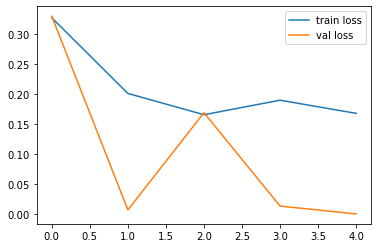

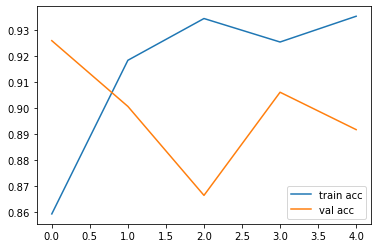

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

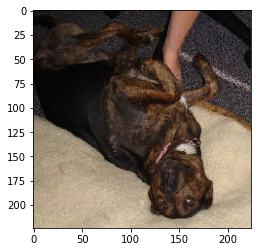

In [35]:
img = image.load_img('catordog/test_set/dog.4024.jpg',target_size=(224,224))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)

In [32]:
img_pred = model.predict(img)
print(img_pred)
if img_pred[0][0] > img_pred[0][1]:
    print('Cat')
else:
    print('Dog')

[[0. 1.]]
Dog
